In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance_matrix
from scipy.sparse.linalg import eigsh

In [21]:
# Set constants/values
N = 1000
pi = math.pi
k = np.linspace(1, N, N)
tk = 2*pi*k/(N+1)
x = np.column_stack((np.cos(tk), np.sin(tk)))
#plt.plot(k, x[0])
#plt.plot(k, x[1])
# Step 1
D = distance_matrix(x, x)
# Step 2
epsilon = 0.05*np.max(D)
# Step 3
W = np.exp(-np.square(D)/epsilon)
# Step 4
#P = W.sum(axis=0).reshape(N,1)
P = W.sum(axis=0)*np.identity(N)
# Step 5
inv_P = np.linalg.inv(P) 
K = np.dot(inv_P,W).dot(inv_P)
# Step 6
Q = K.sum(axis=0)*np.identity(N)
# Step 7
inv_Q_sq = np.zeros(Q.shape)
np.fill_diagonal(inv_Q_sq, 1/(Q.diagonal()**0.5))
T = np.dot(inv_Q_sq,K).dot(inv_Q_sq)
# Step 8
w, v = eigsh(T, k = 5)
#w, v = np.linalg.eig(T)
#w, v = w[:5], v[:5]
# Step 9
## ??? ##
# Step 10
Φ = np.dot(inv_Q_sq, v)

(1000, 5) (5,)
ipykernel_launcher:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


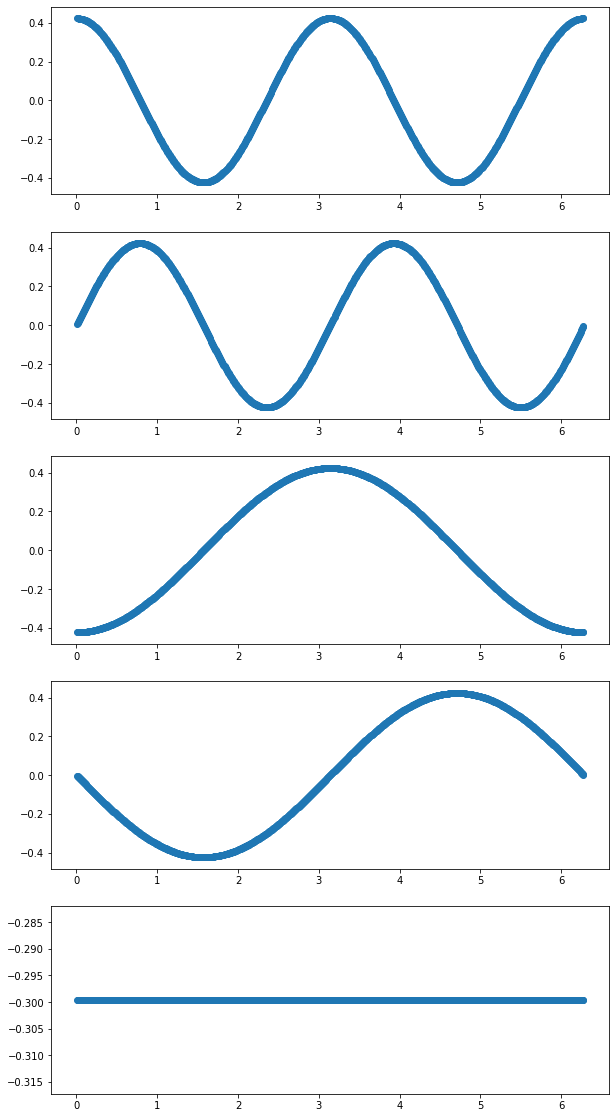

In [24]:
print(np.shape(v), np.shape(w))
fig,ax = plt.subplots(5,1, figsize=(10,20))
for i, eigenvectors in enumerate(Φ.T):
    ax[i].scatter(tk, eigenvectors)
fig.show()